In [2]:
!pip install mediapipe --user

  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/ed/b1/978712efb3c370eca2d4224d1cac4582561f594eb759ba1ed4a082e9a704/mediapipe-0.10.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/81/3c/bbb3ceee9fbefc505f98c24dafda68c7b3c4f83b6951c0712b4623fe4cce/opencv_contrib_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.1 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.1/162.1 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/199.7 kB ? eta -:--:--
     -------------------------------------- 199.7/199.7 kB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/50.5 MB 15.7 MB/s eta 0:00:04
   - -----------

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import mediapipe as mp

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import time

In [6]:
mp_holistic =  mp.solutions.holistic
mp_drawing =  mp.solutions.drawing_utils

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results 


In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    

In [9]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color =(80,110,10), thickness = 1, circle_radius = 1),
                             mp_drawing.DrawingSpec(color = (80,256,121), thickness = 1, circle_radius =1)) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(80,110,10), thickness = 1, circle_radius = 4),
                             mp_drawing.DrawingSpec(color = (80,256,121), thickness = 1, circle_radius =2)) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(80,110,10), thickness = 1, circle_radius = 4),
                             mp_drawing.DrawingSpec(color = (80,256,121), thickness = 1, circle_radius =2)) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color =(80,110,10), thickness = 1, circle_radius = 4),
                             mp_drawing.DrawingSpec(color = (80,256,121), thickness = 1, circle_radius =2)) # Draw right hand connections
    

In [8]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame,holistic)
         
        #Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

## KeyPoint Extraction 

In [10]:
def extract_keypoints(results):
    pose =  np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose ,face ,lh, rh])

## Setup Folders for Collection 

In [38]:
path = "C:\Local Disc D\masters\Artificial Intelligence and Machine learning\Final Project"
DATA_PATH = os.path.join(path,'MP_Data1')
actions = np.array(['hello','thanks','peace'])
no_sequences = 50
sequence_length = 30

In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH ,action, str(sequence)))
        except:
            pass
        

## Collect Keypoint value Training and Testing


In [27]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## Preprocess Data and Create Labels and Features 

In [39]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical


In [40]:
label_map = {label:num for num,label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'peace': 2}

In [41]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])
        
print("sequences")
print(sequences[0])
print("labels")
print(labels)

sequences
[array([ 0.56104094,  0.60224831, -0.63238281, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.56058908,  0.45801395, -0.63413483, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.55897677,  0.42800707, -0.73197669, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.557468  ,  0.40989497, -0.79341948, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.55760539,  0.40135086, -0.86207116, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.55795437,  0.38751346, -0.88066542, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.56918961,  0.33850414, -0.86506498, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.5766952 ,  0.32461765, -0.8508386 , ...,  0.        ,
        0.        ,  0.        ]), array([ 0.58213127,  0.32423747, -0.84661418, ...,  0.        ,
        0.        ,  0.        ]), array([ 0.58347923,  0.33431423, -0.81119502, ...,  0.        ,
        0.        ,  0.        ]),

In [43]:
X = np.array(sequences)


In [44]:
y = to_categorical(labels).astype(int)

In [45]:
X_train,X_test,y_train, y_test =  train_test_split(X,y,test_size = 0.1)

## Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense 
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir= log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64,return_sequences = True, activation = 'relu',input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu' ))
model.add(LSTM(64,return_sequences = False , activation = 'relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(actions.shape[0],activation = 'softmax'))

In [49]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train,y_train, epochs = 50, callbacks = [tb_callback])


In [ ]:
import matplotlib.pyplot as plt

# Assuming model.fit(...) was previously called and history was obtained
history = model.history

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Make predictions

In [31]:
res = model.predict(X_test)

1/1 [==============================] - 1s 644ms/step


## Save Weights

In [32]:
#model.save('action.h5')

#model.save('C:\Local Disc D\masters\Artificial Intelligence and Machine learning\Final Project\action.h5')

model.save('C:\\Local Disc D\\masters\\Artificial Intelligence and Machine learning\\Final Project\\action.h5')



C:\Users\majji\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation using Confusion Matrix and Accuracy

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score 

In [61]:
yhat = model.predict(X_test)


ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

1/1 [==============================] - 0s 64ms/step


In [55]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 4,  1]],

       [[ 9,  0],
        [ 0,  6]],

       [[ 7,  4],
        [ 0,  4]]], dtype=int64)

In [56]:
accuracy_score(ytrue, yhat)

0.7333333333333333

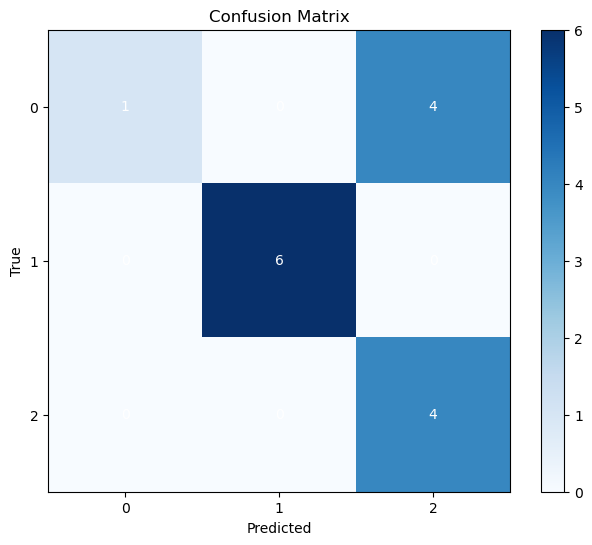

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_pred and y_true are your predicted and true labels respectively
# Compute confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()


# Labels for axes
num_classes = len(np.unique(ytrue))
plt.xticks(np.arange(num_classes))
plt.yticks(np.arange(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')

# Show values in each cell
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white')

plt.show()

## Test in real time

In [79]:
colors = [(245,117,16), (117,245,16),(16,117,245)]

def prob_viz(res,actions, input_frame , colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100) , 90+num*40), colors[num],-1 )
        cv2.putText(output_frame, actions[num] ,(0,85+num*40) , cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
    
    return output_frame
    

In [80]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [59]:
cap.release()

# With Random Forests

## Image Collection 

In [ ]:
import os

import numpy as np
import cv2
from pathlib import Path


DATA_DIR = './data'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 3
dataset_size = 100

cap = cv2.VideoCapture(0)
for j in range(number_of_classes):
    if not os.path.exists(os.path.join(DATA_DIR, str(j))):
        os.makedirs(os.path.join(DATA_DIR, str(j)))

    print('Collecting data for class {}'.format(j))

    done = False
    while True:
        ret, frame = cap.read()
        cv2.putText(frame, 'Ready? Press "Q" ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3,
                    cv2.LINE_AA)
        cv2.imshow('frame', frame)
        if cv2.waitKey(25) == ord('q'):
            break

    counter = 0
    while counter < dataset_size:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        cv2.waitKey(25)
        cv2.imwrite(os.path.join(DATA_DIR, str(j), '{}.jpg'.format(counter)), frame)

        counter += 1

cap.release()
cv2.destroyAllWindows()

## Create Data set for one hand gestures 

In [ ]:
import os
import pickle
from pathlib import Path
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)


        if not (results.multi_hand_landmarks is None):
                n = len(results.multi_hand_landmarks)
                if n == 1:
                    try:
                        for hand_landmarks in results.multi_hand_landmarks:
                             for i in range(len(hand_landmarks.landmark)):
                                  x= hand_landmarks.landmark[i].x
                                  y= hand_landmarks.landmark[i].y
                                  x_.append(x)
                                  y_.append(y)
                             for i in range(len(hand_landmarks.landmark)):
                                   x = hand_landmarks.landmark[i].x
                                   y = hand_landmarks.landmark[i].y
                                   data_aux.append(x - min(x_))
                                   data_aux.append(y - min(y_))
                        data.append(data_aux)
                        labels.append(dir_)


                    except:
                            data_aux(np.zeros([1,63], dtype=int)[0])







f = open('onehand.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()


## Create dataset for two hands gestures 

In [ ]:
import os
import pickle
from pathlib import Path
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np


mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = './data'

data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)


        if not (results.multi_hand_landmarks is None):
                n = len(results.multi_hand_landmarks)
                if n == 2:
                    try:
                        for hand_landmarks in results.multi_hand_landmarks:
                             for i in range(len(hand_landmarks.landmark)):
                                  x= hand_landmarks.landmark[i].x
                                  y= hand_landmarks.landmark[i].y
                                  x_.append(x)
                                  y_.append(y)
                             for i in range(len(hand_landmarks.landmark)):
                                   x = hand_landmarks.landmark[i].x
                                   y = hand_landmarks.landmark[i].y
                                   data_aux.append(x - min(x_))
                                   data_aux.append(y - min(y_))
                        data.append(data_aux)
                        labels.append(dir_)


                    except:
                            data_aux(np.zeros([1,189], dtype=int)[0])







f = open('twohand.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()


## Train classifier 

In [ ]:
import pickle
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


data_dict = pickle.load(open('./onehand.pickle', 'rb'))
data_dict2 = pickle.load(open('./twohand.pickle', 'rb'))
data_one = np.asarray(data_dict['data'])
data_two = np.asarray(data_dict2['data'])
labels1 = np.asarray(data_dict['labels'])
labels2 = np.asarray(data_dict2['labels'])


x_train, x_test, y_train, y_test, = train_test_split(data_one, labels1, test_size=0.2, shuffle=True, stratify=labels1)
x_train2, x_test2, y_train2, y_test2, = train_test_split(data_two, labels2, test_size=0.2, shuffle=True, stratify=labels2)

model1 = RandomForestClassifier()
model2 = RandomForestClassifier()

model1.fit(x_train, y_train)
model2.fit(x_train2, y_train2)

y_predict = model1.predict(x_test)
y_predict2 = model2.predict(x_test2)

score1 = accuracy_score(y_predict, y_test)
score2= accuracy_score(y_predict2, y_test2)

print('{}% of samples were classified correctly for model1 !'.format(score1 * 100))
print('{}% of samples were classified correctly for model2 !'.format(score2 * 100))

f = open('model1.p', 'wb')
pickle.dump({'model1': model1}, f)
f.close()
f = open('model2.p', 'wb')
pickle.dump({'model2': model2}, f)
f.close()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

model_dict1 = pickle.load(open('./model1.p', 'rb'))
model_dict2 = pickle.load(open('./model2.p', 'rb'))
model1 = model_dict1['model1']
model2 = model_dict2['model2']


cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2 ,min_detection_confidence=0.3)

labels_dict1 = {0: 'Peace', 1: 'Hello'}
labels_dict2 = {2: 'Thanks'}
while True:

    data_aux = []
    x_ = []
    y_ = []

    ret, frame = cap.read()

    H, W, _ = frame.shape

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(frame_rgb)
    if results.multi_hand_landmarks:
        n = len(results.multi_hand_landmarks)
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                frame,  # image to draw
                hand_landmarks,  # model output
                mp_hands.HAND_CONNECTIONS,  # hand connections
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

        for hand_landmarks in results.multi_hand_landmarks:
            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y

                x_.append(x)
                y_.append(y)

            for i in range(len(hand_landmarks.landmark)):
                x = hand_landmarks.landmark[i].x
                y = hand_landmarks.landmark[i].y
                data_aux.append(x - min(x_))
                data_aux.append(y - min(y_))
        if n==1:

            x1 = int(min(x_) * W) - 10
            y1 = int(min(y_) * H) - 10

            x2 = int(max(x_) * W) - 10
            y2 = int(max(y_) * H) - 10

            prediction1 = model1.predict([np.asarray(data_aux)])

            predicted_character1 = labels_dict1[int(prediction1[0])]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
            cv2.putText(frame, predicted_character1, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)
        else:
             x1 = int(min(x_) * W) - 10
             y1 = int(min(y_) * H) - 10

             x2 = int(max(x_) * W) - 10
             y2 = int(max(y_) * H) - 10

             prediction2 = model2.predict([np.asarray(data_aux)])

             predicted_character2 = labels_dict2[int(prediction2[0])]

             cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 4)
             cv2.putText(frame, predicted_character2, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), 3,
                        cv2.LINE_AA)

    cv2.imshow('frame', frame)
    cv2.waitKey(1)


cap.release()
cv2.destroyAllWindows()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix1 = confusion_matrix(y_test, y_predict)
conf_matrix2 = confusion_matrix(y_test2, y_predict2)


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


plot_confusion_matrix(conf_matrix1, "Confusion Matrix for Model 1")
plot_confusion_matrix(conf_matrix2, "Confusion Matrix for Model 2")
